# 插值

## scipy

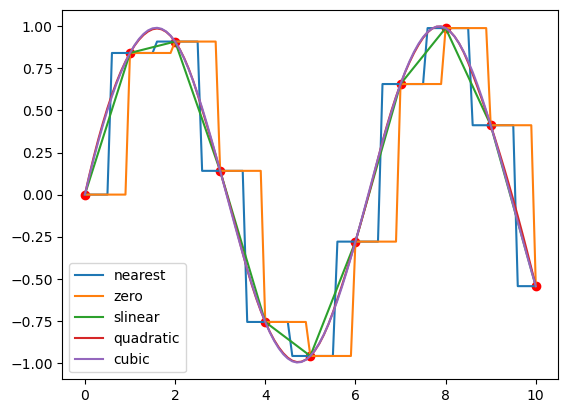

In [4]:
import numpy as np
from scipy import interpolate
import pylab as pl
4   
x=np.linspace(0,10,11)
y=np.sin(x)
xnew=np.linspace(0,10,101)
pl.plot(x,y,'ro')

for kind in ["nearest","zero","slinear","quadratic","cubic"]:
    f=interpolate.interp1d(x,y,kind)
    ynew=f(xnew)
    pl.plot(xnew,ynew,label=str(kind))
pl.legend(loc="lower left")
pl.show()

### 二维插值

In [13]:
import numpy as np
from scipy import interpolate
import pylab as pl
import matplotlib.pyplot as plt

def func(x,y):
    return (x+y)*np.exp(-5.0*(x**2+y**2))

# x,y=np.meshgrid([np.linspace(-1,1,21)],[np.linspace(-1,1,21)])
x,y=np.mgrid[-1:1:15j,-1:1:15j]

In [16]:
x.shape

(10, 10)

In [14]:
fvals=func(x,y)

In [23]:
newfunc=interpolate.interp2d(x,y,fvals,kind='cubic')


In [24]:
xnew=np.linspace(-1,1,101)
ynew=np.linspace(-1,1,101)
fnew=newfunc(xnew,ynew)


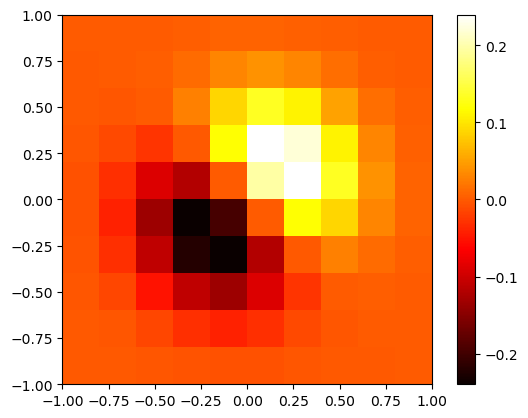

In [22]:
im1=plt.imshow(fvals,extent=[-1,1,-1,1],cmap=plt.cm.hot,interpolation="nearest",origin="lower")
plt.colorbar(im1)

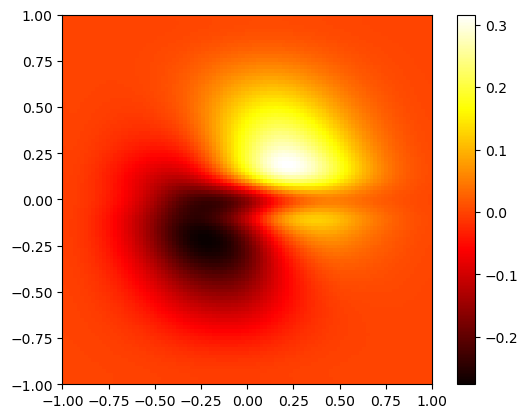

In [25]:
im2=plt.imshow(fnew,extent=[-1,1,-1,1],cmap=plt.cm.hot,interpolation="nearest",origin="lower")
plt.colorbar(im2)

### 二维插值三维演示

In [26]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy import interpolate
import matplotlib.cm as cm

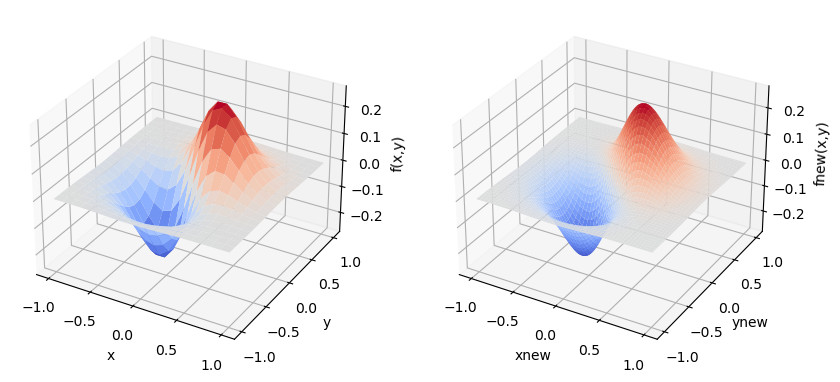

In [34]:
def func(x,y):
    return (x+y)*np.exp(-5.0*(x**2+y**2))

x=np.linspace(-1,1,20)
y=np.linspace(-1,1,20)

x,y=np.meshgrid(x,y)

fvals=func(x,y)

fig=plt.figure(figsize=(10,6))

ax=plt.subplot(1,2,1,projection='3d')
surf=ax.plot_surface(x,y,fvals,cmap=cm.coolwarm,linewidth=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')


newfunc=interpolate.interp2d(x,y,fvals,kind='cubic')

xnew=np.linspace(-1,1,100)
ynew=np.linspace(-1,1,100)
fnew=newfunc(xnew,ynew)

xnew,ynew=np.meshgrid(xnew,ynew)

ax2=plt.subplot(1,2,2,projection='3d')
surf2=ax2.plot_surface(xnew,ynew,fnew,cmap=cm.coolwarm,linewidth=0.5)
ax2.set_xlabel('xnew')
ax2.set_ylabel('ynew')
ax2.set_zlabel('fnew(x,y)')


plt.show()



### 图像双线性插值

<!-- ![example](test.png "原理") -->

<div align="center"> <img src="test.png" width = 900 height = 500 /> </div>

#### nearest neighbors

In [58]:
def nearest_neighbors(image,target):
    if target[0]<image.shape[0] and target[1]<image.shape[1]:
        raise ValueError("target must bigger than image")
    target_image=np.zeros(shape=(*target,image.shape[2]))

    alpha_h =target[0]/image.shape[0]
    alpha_w =target[1]/image.shape[1]

    for tar_x in range(target_image.shape[0]-1):
        for tar_y in range(target_image.shape[1]-1):
            src_x=round(tar_x/alpha_h)
            src_y=round(tar_y/alpha_w)

            target_image[tar_x,tar_y]=image[src_x,src_y]

    return target_image


(1920, 1080, 3)


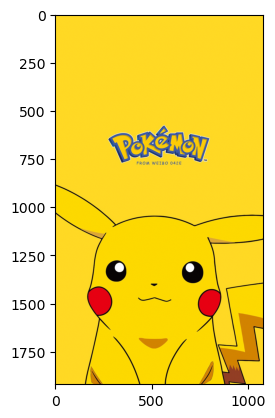

In [75]:
import matplotlib.pyplot as plt

data=plt.imread("picar.jpg")
# data.show()
print(data.shape)
data=data/255
plt.imshow(data)

(2000, 1600, 3)


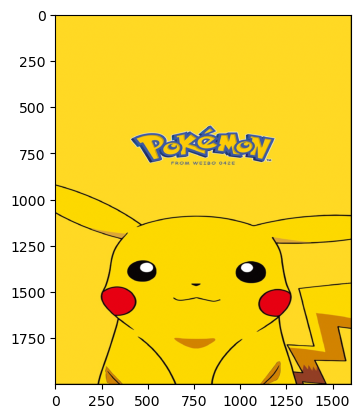

In [74]:
output=nearest_neighbors(data,(2000,1600))
print(output.shape)
plt.imshow(output)

#### Bilinear

In [87]:
def bilinear(image, target):
    if target[0] < image.shape[0] or target[1] < image.shape[1]:
        raise ValueError("target must bigger than image")

    scale_x=target[0]/image.shape[0]
    scale_y=target[1]/image.shape[1]

    output=np.zeros((*target,image.shape[2]))
    print(output.shape)
    for tar_x in range(target[0]):
        for tar_y in range(target[1]):
            src_x=(tar_x+0.5)/scale_x -0.5
            src_y=(tar_y+0.5)/scale_y -0.5

            src_x_clip=np.clip(np.floor(src_x), 0, image.shape[0]-2).astype(np.int)
            src_y_clip=np.clip(np.floor(src_y), 0, image.shape[1]-2).astype(np.int)

            q_0,q_1=src_x_clip,src_x_clip+1
            w_0,w_1=src_y_clip,src_y_clip+1

            u=src_x-q_0
            v=src_y-w_0

            f=image[q_0,w_0,:]*(1-u)*(1-v)+image[q_1,w_0,:]*u*(1-v)+image[q_0,w_1,:]*(1-u)*v+image[q_1,w_1,:]*u*v
            output[tar_x,tar_y]=f

    return output

    

(2000, 2000, 3)


C:\Users\ZuYong\AppData\Local\Temp\ipykernel_19724\289589385.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  src_x_clip=np.clip(np.floor(src_x), 0, image.shape[0]-2).astype(np.int)
C:\Users\ZuYong\AppData\Local\Temp\ipykernel_19724\289589385.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

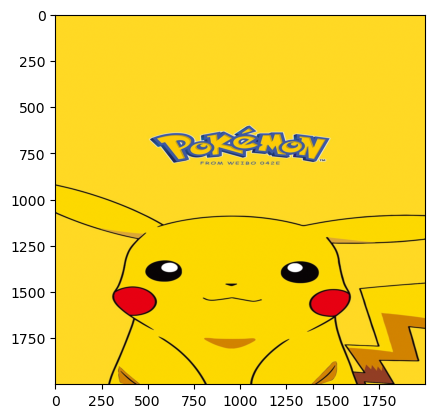

In [88]:
plt.imshow(bilinear(plt.imread("picar.jpg")/255,(2000,2000)))

#### bicubic


##### cubic


In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

### LU分解


In [5]:
import numpy as np
import pandas as pd

np.random.seed(2)

def LU_decomposition(A):
    n=len(A[0])
    L=np.zeros((n,n))
    U=np.zeros((n,n))
    for i in range(n):
        L[i,i]=1
        if i==0:
            U[0,0]=A[0,0]
            for j in range(1,n):
                U[0,j]=A[0,j]
                L[j,0]=A[j,0]/U[0,0]
        else:
            #U
            for j in range(i,n):
                temp=0
                for k in range(0,i):
                    temp=temp+L[i,k]*U[k,j]
                U[i,j]=A[i,j]-temp
            #L
            for j in range(i+1,n):
                temp=0
                for k in range(0,i):
                    temp=temp+L[j,k]+U[k,i]
                L[j,i]=(A[j,i]-temp)/U[i,i]
    return L,U

A=np.random.rand(2,2)
print(A)
L,U=LU_decomposition(A)
print(L)
print(U)
print(np.matmul(L,U))

[[0.4359949  0.02592623]
 [0.54966248 0.43532239]]
[[1.        0.       ]
 [1.2607085 1.       ]]
[[0.4359949  0.02592623]
 [0.         0.40263697]]
[[0.4359949  0.02592623]
 [0.54966248 0.43532239]]


#### LDU分解

In [6]:
def LDU_decomposition(A):
    n=len(A[0])
    L=np.zeros((n,n))
    U=np.zeros((n,n))
    D=np.zeros((n,n))
    for i in range(n):
        L[i,i]=1
        if i==0:
            U[0,0]=A[0,0]
            for j in range(1,n):
                U[0,j]=A[0,j]
                L[j,0]=A[j,0]/U[0,0]
        else:
            #U
            for j in range(i,n):
                temp=0
                for k in range(0,i):
                    temp=temp+L[i,k]*U[k,j]
                U[i,j]=A[i,j]-temp
            #L
            for j in range(i+1,n):
                temp=0
                for k in range(0,i):
                    temp=temp+L[j,k]+U[k,i]
                L[j,i]=(A[j,i]-temp)/U[i,i]
    for i in range(n):
        D[i,i]=U[i,i]
        for j in range(i,n):
            U[i,j]=U[i,j]/D[i,i]
    return L,D,U

In [8]:
A=np.random.rand(2,2)
L,D,U=LDU_decomposition(A)
print(A)
print(L)
print(D)
print(U)

[[0.29965467 0.26682728]
 [0.62113383 0.52914209]]
[[1.         0.        ]
 [2.07283212 1.        ]]
[[ 0.29965467  0.        ]
 [ 0.         -0.02394605]]
[[1.         0.89044924]
 [0.         1.        ]]


In [9]:
print(np.matmul(np.matmul(L,D),U))

[[0.29965467 0.26682728]
 [0.62113383 0.52914209]]


In [15]:
def det_matrix(A):
    if len(A)<=0:
        return None
    elif len(A)==1:
        return A[0,0]
    else:
        s=0
        for i in range(len(A)):
            # A_i=[[row(a) for a in range(len(A)) if a!=i]for row in A[1:]]
            A_i=np.delete(np.delete(A,(0),axis=0),i,axis=1)
            s+=A[0,i]*det_matrix(A_i)*(-1)**(i)

        return s
A=np.random.rand(5,5)
print(np.linalg.det(A))

print(det_matrix(A))

-0.013767795243356253
-0.013767795243356244


#### Clout分解